In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 准备数据集
data_path='D:\PyProjects\DataSet/NaiveBayers/data_multivar.txt'
df=pd.read_csv(data_path,header=None)
# print(df.head())
# print(df.info()) # 查看数据信息，确保没有错误
dataset_X,dataset_y=df.iloc[:,:-1],df.iloc[:,-1] # 拆分为X和Y
# print(dataset_X.head())
# print(dataset_X.info())
# print('-'*100)
# print(dataset_y.head())
dataset_X=dataset_X.values
dataset_y=dataset_y.values
# print(dataset_X.shape) # (400, 2)
# print(dataset_y.shape) # (400,)
classes=list(set(dataset_y)) 
print('class Num: {}, class: {}'.format(len(classes), classes))
# 上面检查加载没有问题，一共有四个不同类别，类别名称为：0,1,2,3


class Num: 4, class: [0, 1, 2, 3]


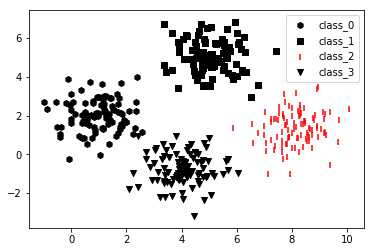

In [3]:
# 数据集可视化
def visual_2D_dataset(dataset_X,dataset_y):
    '''将二维数据集dataset_X和对应的类别dataset_y显示在散点图中'''
    assert dataset_X.shape[1]==2,'only support dataset with 2 features'
    plt.figure()
    classes=list(set(dataset_y)) 
    markers=['.',',','o','v','^','<','>','1','2','3','4','8'
             ,'s','p','*','h','H','+','x','D','d','|']
    colors=['b','c','g','k','m','w','r','y']
    for class_id in classes:
        one_class=np.array([feature for (feature,label) in 
                   zip(dataset_X,dataset_y) if label==class_id])
        plt.scatter(one_class[:,0],one_class[:,1],marker=np.random.choice(markers,1)[0],
                    c=np.random.choice(colors,1)[0],label='class_'+str(class_id))
    plt.legend()

visual_2D_dataset(dataset_X,dataset_y)

In [4]:
# 将分类器绘制到图中
def plot_classifier(classifier, X, y):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0 # 计算图中坐标的范围
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    step_size = 0.01 # 设置step size
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    # 构建网格数据
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape) 
    plt.figure()
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

GaussianNB, correct prediction num: 398, accuracy: 99.50%


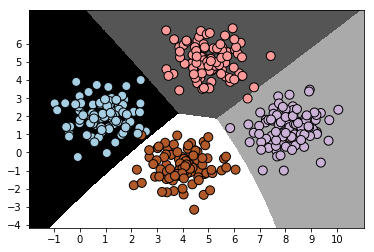

In [5]:
# 使用GaussianNB分类器构建朴素贝叶斯模型
from sklearn.naive_bayes import GaussianNB
gaussianNB=GaussianNB()
gaussianNB.fit(dataset_X,dataset_y)

# 评估本模型在整个数据集上的表现
dataset_predict_y=gaussianNB.predict(dataset_X)
correct_predicts=(dataset_predict_y==dataset_y).sum()
accuracy=100*correct_predicts/dataset_y.shape[0]
print('GaussianNB, correct prediction num: {}, accuracy: {:.2f}%'
      .format(correct_predicts,accuracy))

plot_classifier(gaussianNB,dataset_X,dataset_y)

In [6]:
# 使用MultinomialNB分类器构建朴素贝叶斯模型
from sklearn.naive_bayes import MultinomialNB
multinomialNB=MultinomialNB()
multinomialNB.fit(dataset_X,dataset_y) 
# 此处报错，multinomialNB的数据集的特征属性必须是非负数

# 评估本模型在整个数据集上的表现
dataset_predict_y_multi=multinomialNB.predict(dataset_X)
correct_predicts_multi=(dataset_predict_y_multi==dataset_y).sum()
accuracy=100*correct_predicts_multi/dataset_y.shape[0]
print('MultinomialNB, correct prediction num: {}, accuracy: {:.2f}%'
      .format(correct_predicts,accuracy))

ValueError: Input X must be non-negative

BernoulliNB, correct prediction num: 195, accuracy: 48.75%


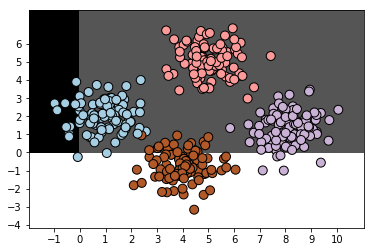

In [7]:
# 使用BernouliNB分类器构建朴素贝叶斯模型
from sklearn.naive_bayes import BernoulliNB
bernoulliNB=BernoulliNB()
bernoulliNB.fit(dataset_X,dataset_y) 

# 评估本模型在整个数据集上的表现
dataset_predict_y_bern=bernoulliNB.predict(dataset_X)
correct_predicts_bern=(dataset_predict_y_bern==dataset_y).sum()
accuracy=100*correct_predicts_bern/dataset_y.shape[0]
print('BernoulliNB, correct prediction num: {}, accuracy: {:.2f}%'
      .format(correct_predicts_bern,accuracy))

plot_classifier(bernoulliNB,dataset_X,dataset_y)